# Tutorial 2.1: Linearizing the Equations of Motion (Example only)
In this tutorial you will learn to linearize the Equations of Motion of the pendulum as covered in the lecture. 

## Part 1: Kinematic equations

We first start by defining the variables. Let's start with the kinematic relations of a pendulum hanging from the point $(x_0, z_0)$.

In [1]:
from sympy import *
var("t x1 z1 r phi0") # independent variables      
phi1 = Function("phi1")(t)
x2 = x1 + r*cos(phi1)
z2 = z1 + r*sin(phi1)

The velocities can then be obtained using:

In [2]:
xdot = diff(x2, t)
zdot = diff(z2, t)

## Part 2: Energy equations
### Kinetic energy:
The in this system is $m$, such that the kinetic energy is given by:

In [3]:
var("m")
T = 0.5*m*(xdot**2 + zdot**2)
T.evalf()

0.5*m*(r**2*sin(phi1(t))**2*Derivative(phi1(t), t)**2 + r**2*cos(phi1(t))**2*Derivative(phi1(t), t)**2)

This expression can be simplified to:

In [4]:
T = simplify(T) # Linearization
T.evalf()

0.5*m*r**2*Derivative(phi1(t), t)**2

### Potential energy:
The potential energy on the pendulum is due to gravity:

In [5]:
var("g")
V = m*g*z2
V.evalf()

g*m*(r*sin(phi1(t)) + z1)

## Step 3: Construct the Lagrangian

In [6]:
L = T - V
L.evalf()

-g*m*(r*sin(phi1(t)) + z1) + 0.5*m*r**2*Derivative(phi1(t), t)**2

## Step 4: Obtaining the EoM

In order to obtain the EoMs we have to take derivatives w.r.t. $\phi_1$ and its velocity. 

In [7]:
EOM_phi = diff( diff(L, diff(phi1, t)), t) - diff(L, phi1)
# ! LHS needs derivative to get "velocity"
EOM_phi = simplify(EOM_phi)
EOM_phi.evalf()

m*r*(g*cos(phi1(t)) + 1.0*r*Derivative(phi1(t), (t, 2)))

The equation is nonlinear since it depends on the cosine of the angle. We want to obtain a linear function, so let's linearize. We consider a perturbation around the point we want to linearize ($\phi_0$). We linearize with the following function substitution: $\phi_1(t) = \phi_0 + \epsilon \psi(t)$. The $\epsilon$ is added in order to apply the Taylor series expansion. 

On a technical note: Using SymPy for function substitution can be tricky, hence we will use temporary symbols called `tmp1` and `tmp2` in order to do the substitution.

In [8]:
var("phi0 epsilon")
psi = Function("psi")(t) # perturbation function

tmp1 = symbols("tmp1")
EOM_psi = EOM_phi.evalf(subs={phi1: tmp1})
EOM_psi = EOM_psi.evalf(subs={tmp1: phi0 + epsilon*psi})
print(EOM_psi)
EOM_psi.evalf()

m*r*(g*cos(epsilon*psi(t) + phi0) + 1.0*r*Derivative(epsilon*psi(t) + phi0, (t, 2)))


m*r*(g*cos(epsilon*psi(t) + phi0) + 1.0*r*Derivative(epsilon*psi(t) + phi0, (t, 2)))

Now, we can apply the Taylor series expansion using the function $\epsilon$ as a variable.

In [9]:
EOM_lin = series(EOM_psi, epsilon, n=2)
EOM_lin.evalf()

1.0*m*r**2*Derivative(phi0, (t, 2)) + g*m*r*cos(phi0) + epsilon*(-g*m*r*psi(t)*sin(phi0) + 1.0*m*r**2*Derivative(psi(t), (t, 2))) + O(epsilon**2)

Note that we know that $\frac{d^2\phi_0}{dt^2}=0$, so we can redefine the derivative in terms of $\psi$ only.

In [10]:
tmp2 = symbols("tmp2")
EOM_psi2 = EOM_phi.evalf(subs={diff(phi1, (t, 2)): tmp2, phi1: tmp1})
EOM_psi2 = EOM_psi2.evalf(subs={tmp2: diff(phi0 + epsilon*psi, (t, 2)), tmp1: phi0 + epsilon*psi})
EOM_psi2.evalf()

m*r*(1.0*epsilon*r*Derivative(psi(t), (t, 2)) + g*cos(epsilon*psi(t) + phi0))

In [11]:
EOM_lin = series(EOM_psi2, epsilon, n=2)
EOM_lin.evalf()

g*m*r*cos(phi0) + epsilon*(-g*m*r*psi(t)*sin(phi0) + 1.0*m*r**2*Derivative(psi(t), (t, 2))) + O(epsilon**2)

Then, we obtain the linearized EOM by setting $\epsilon = 1$.

In [12]:
EOM_lin = EOM_lin.removeO().evalf(subs={epsilon: 1})
EOM_lin.evalf()

-g*m*r*psi(t)*sin(phi0) + g*m*r*cos(phi0) + 1.0*m*r**2*Derivative(psi(t), (t, 2))

We see that we get an expression that only depends on (linearly) on the perturbation $\psi(t)$. Isolating the second derivative with respect to time of the perturbation, we get the final expression of the linearized system.

In [13]:
EOM_lin_iso = solve(EOM_lin, diff(psi, (t, 2)))
EOM_lin_iso[0].evalf()

g*(psi(t)*sin(phi0) - cos(phi0))/r

In this problem, our initial angle is $\phi_0 = 3*\frac{\pi}{2}$, then the final Equation of Motion will be:

In [14]:
a = EOM_lin_iso[0].evalf(subs={phi0: 3*pi/2})
a

-g*psi(t)/r

### Remarks

1) The problem studied here is already linear with respect to the accelerations and does not depend on velocities. If we had a nonlinear dependency on accelerations and/or velocities, we should have taken into account the gradients with respect these two quantities.
2) For a multiple DOF system, this process has to be done for all the EOM associated to each DOF.


## Part 3: Solve the equation

Now we can solve the equation using an ODE solver

In [15]:
tsym, psisym = symbols("tsym psisym")
print(a)
a = a.evalf(subs={t: tsym, psi: psisym, g: 9.81, r: 1.0})
print(a)
def qdot(t,q):
    vt = q[1]
    at = a.evalf(subs={psisym: q[0], tsym: t})
    return [vt,at]

-g*psi(t)/r
-9.81*psisym


In [16]:
# Just for demonstration
qdot(0,[0,0])

[0, 0]

In [17]:
from scipy.integrate import solve_ivp
sol = solve_ivp(fun=qdot,t_span=[0,10],y0=[1,0])
# Note: The initial "angle" of 1 would not be considered small, so the linearization would in practice not be physically accurate.

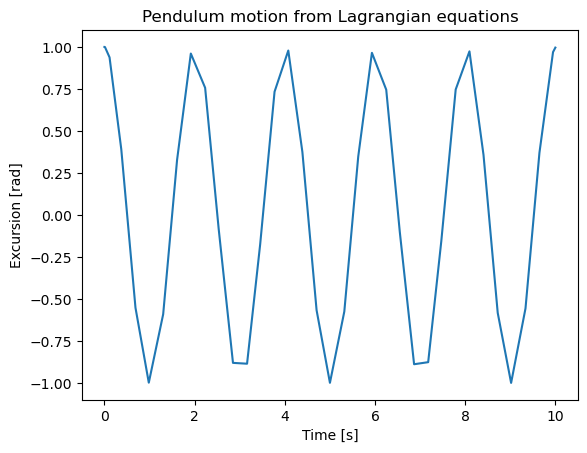

In [18]:
import matplotlib.pyplot as plt
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time [s]")
plt.ylabel("Excursion [rad]")
plt.title("Pendulum motion from Lagrangian equations");

-----------------------------------------------------------------------------------------------------
[The solution can be found here.](w2_t1_sol.ipynb)